# Homework 3: Prediction and Classification

Due: Thursday, October 16, 2014 11:59 PM

<a href=https://raw.githubusercontent.com/cs109/2014/master/homework/HW3.ipynb download=HW3.ipynb> Download this assignment</a>

#### Submission Instructions
To submit your homework, create a folder named lastname_firstinitial_hw# and place your IPython notebooks, data files, and any other files in this folder. Your IPython Notebooks should be completely executed with the results visible in the notebook. We should not have to run any code. Compress the folder (please use .zip compression) and submit to the CS109 dropbox in the appropriate folder. If we cannot access your work because these directions are not followed correctly, we will not grade your work.

---


# Introduction

In this assignment you will be using regression and classification to explore different data sets.  

**First**: You will use data from before 2002 in the [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics) to create a metric for picking baseball players using linear regression. This is same database we used in Homework 1. This database contains the "complete batting and pitching statistics from 1871 to 2013, plus fielding statistics, standings, team stats, managerial records, post-season data, and more". [Documentation provided here](http://seanlahman.com/files/database/readme2012.txt).

!["Sabermetrics Science"](http://saberseminar.com/wp-content/uploads/2012/01/saber-web.jpg)
http://saberseminar.com/wp-content/uploads/2012/01/saber-web.jpg

**Second**: You will use the famous [iris](http://en.wikipedia.org/wiki/Iris_flower_data_set) data set to perform a $k$-neareast neighbor classification using cross validation.  While it was introduced in 1936, it is still [one of the most popular](http://archive.ics.uci.edu/ml/) example data sets in the machine learning community. Wikipedia describes the data set as follows: "The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres." Here is an illustration what the four features measure:

!["iris data features"](http://sebastianraschka.com/Images/2014_python_lda/iris_petal_sepal.png)
http://sebastianraschka.com/Images/2014_python_lda/iris_petal_sepal.png

**Third**: You will investigate the influence of higher dimensional spaces on the classification using another standard data set in machine learning called the The [digits data set](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html).  This data set is similar to the MNIST data set discussed in the lecture. The main difference is, that each digit is represented by an 8x8 pixel image patch, which is considerably smaller than the 28x28 pixels from MNIST. In addition, the gray values are restricted to 16 different values (4 bit), instead of 256 (8 bit) for MNIST. 

**Finally**: In preparation for Homework 4, we want you to read through the following articles related to predicting the 2014 Senate Midterm Elections. 

* [Nate Silver's Methodology at while at NYT](http://fivethirtyeight.blogs.nytimes.com/methodology/)
* [How The FiveThirtyEight Senate Forecast Model Works](http://fivethirtyeight.com/features/how-the-fivethirtyeight-senate-forecast-model-works/)
* [Pollster Ratings v4.0: Methodology](http://fivethirtyeight.com/features/pollster-ratings-v40-methodology/)
* [Pollster Ratings v4.0: Results](http://fivethirtyeight.com/features/pollster-ratings-v40-results/)
* [Nate Silver versus Sam Wang](http://www.washingtonpost.com/blogs/plum-line/wp/2014/09/17/nate-silver-versus-sam-wang/)
* [More Nate Silver versus Sam Wang](http://www.dailykos.com/story/2014/09/09/1328288/-Get-Ready-To-Rumbllllle-Battle-Of-The-Nerds-Nate-Silver-VS-Sam-Wang)
* [Nate Silver explains critisims of Sam Wang](http://politicalwire.com/archives/2014/10/02/nate_silver_rebuts_sam_wang.html)
* [Background on the feud between Nate Silver and Sam Wang](http://talkingpointsmemo.com/dc/nate-silver-sam-wang-feud)
* [Are there swing voters?]( http://www.stat.columbia.edu/~gelman/research/unpublished/swing_voters.pdf)



---

## Load Python modules

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import requests 
import StringIO
import zipfile
import numpy as np
import pandas as pd # pandas
import matplotlib.pyplot as plt # module for plotting 

# If this module is not already installed, you may need to install it. 
# You can do this by typing 'pip install seaborn' in the command line
import seaborn as sns 

import sklearn
import sklearn.datasets
import sklearn.cross_validation
import sklearn.decomposition
import sklearn.grid_search
import sklearn.neighbors
import sklearn.metrics

/Users/William/anaconda3/envs/python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/Users/William/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/William/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refac

# Problem 1: Sabermetrics

Using data preceding the 2002 season pick 10 offensive players keeping the payroll under $20 million (assign each player the median salary). Predict how many games this team would win in a 162 game season.  

In this problem we will be returning to the [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics) that we used in Homework 1.  From this database, we will be extract five data sets containing information such as yearly stats and standing, batting statistics, fielding statistics, player names, player salaries and biographical information. You will explore the data in this database from before 2002 and create a metric for picking players. 

#### Problem 1(a) 

Load in [these CSV files](http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip) from the [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics). For this assignment, we will use the 'Teams.csv', 'Batting.csv', 'Salaries.csv', 'Fielding.csv', 'Master.csv' tables. Read these tables into separate pandas DataFrames with the following names. 

CSV file name | Name of pandas DataFrame
:---: | :---: 
Teams.csv | teams
Batting.csv | players
Salaries.csv | salaries
Fielding.csv | fielding
Master.csv | master

In [2]:
### Your code here ###
def load_database(fname):
    zipped = requests.get('http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip').content
    unzipped = zipfile.ZipFile(StringIO.StringIO(zipped))
    return pd.read_csv(StringIO.StringIO(unzipped.read(fname)))

teams = load_database('Teams.csv')
players = load_database('Batting.csv')
salaries = load_database('Salaries.csv')
fielding = load_database('Fielding.csv')
master = load_database('Master.csv')

#### Problem 1(b)

Calculate the median salary for each player and create a pandas DataFrame called `medianSalaries` with four columns: (1) the player ID, (2) the first name of the player, (3) the last name of the player and (4) the median salary of the player. Show the head of the `medianSalaries` DataFrame.   

In [3]:
### Your code here ###
tempSalary = salaries.groupby('playerID')['playerID', 'salary'].median()
medianSalaries = pd.merge(master[['playerID', 'nameFirst', 'nameLast']], tempSalary, left_on='playerID', right_index=True)
medianSalaries.head()

playerID nameFirst nameLast  salary
0   aardsda01     David  Aardsma  419000
3    aasedo01       Don     Aase  612500
4    abadan01      Andy     Abad  327000
5    abadfe01  Fernando     Abad  451500
13  abbotje01      Jeff   Abbott  255000

#### Problem 1(c)

Now, consider only team/season combinations in which the teams played 162 Games. Exclude all data from before 1947. Compute the per plate appearance rates for singles, doubles, triples, HR, and BB. Create a new pandas DataFrame called `stats` that has the teamID, yearID, wins and these rates.

**Hint**: Singles are hits that are not doubles, triples, nor HR. Plate appearances are base on balls plus at bats.

In [4]:
teams.columns

Index([u'yearID', u'lgID', u'teamID', u'franchID', u'divID', u'Rank', u'G',
       u'Ghome', u'W', u'L', u'DivWin', u'WCWin', u'LgWin', u'WSWin', u'R',
       u'AB', u'H', u'2B', u'3B', u'HR', u'BB', u'SO', u'SB', u'CS', u'HBP',
       u'SF', u'RA', u'ER', u'ERA', u'CG', u'SHO', u'SV', u'IPouts', u'HA',
       u'HRA', u'BBA', u'SOA', u'E', u'DP', u'FP', u'name', u'park',
       u'attendance', u'BPF', u'PPF', u'teamIDBR', u'teamIDlahman45',
       u'teamIDretro'],
      dtype='object')

In [5]:
### Your code here ###
teamsModified = teams[(teams.yearID > 1947) & (teams.G == 162)].copy()
teamsModified['PA'] = teamsModified['AB'] + teamsModified['BB']
teamsModified['1B'] = teamsModified['H'] - teamsModified['2B'] - teamsModified['3B'] - teamsModified['HR']
stats = pd.concat([teamsModified['teamID'], teamsModified['yearID'], teamsModified['W'], 
                   teamsModified['1B']/teamsModified['PA'], teamsModified['2B']/teamsModified['PA'], 
                   teamsModified['3B']/teamsModified['PA'], teamsModified['HR']/teamsModified['PA'], 
                   teamsModified['BB']/teamsModified['PA']], axis=1, 
                  keys=['teamID', 'yearID', 'W', '1B', '2B', '3B', 'HR', 'BB'])
stats.head()

teamID  yearID   W        1B        2B        3B        HR        BB
1366    LAA    1961  70  0.147748  0.035708  0.003604  0.030958  0.111548
1367    KC1    1961  61  0.164751  0.035982  0.007829  0.014993  0.096618
1377    NYA    1962  96  0.167148  0.038536  0.004656  0.031952  0.093770
1379    LAA    1962  86  0.159482  0.038027  0.005737  0.022455  0.098672
1381    CHA    1962  85  0.165797  0.040756  0.009129  0.014998  0.101076

#### Problem 1(d)

Is there a noticeable time trend in the rates computed computed in Problem 1(c)? 

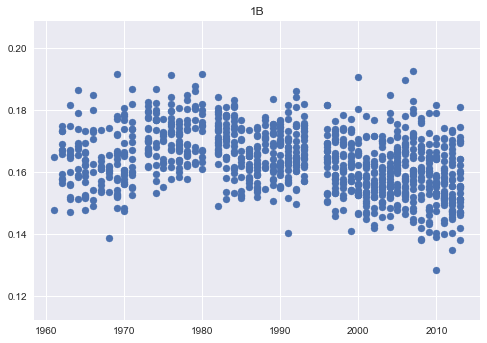

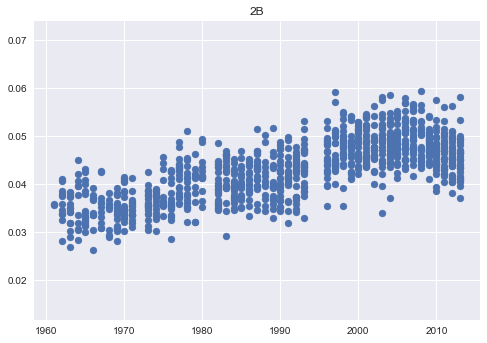

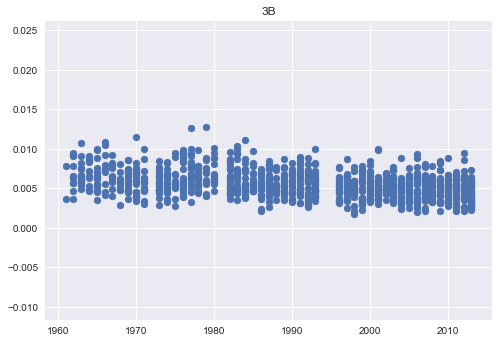

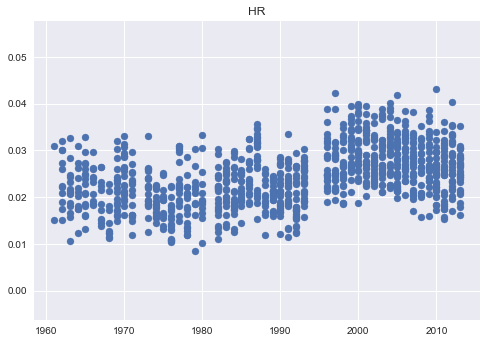

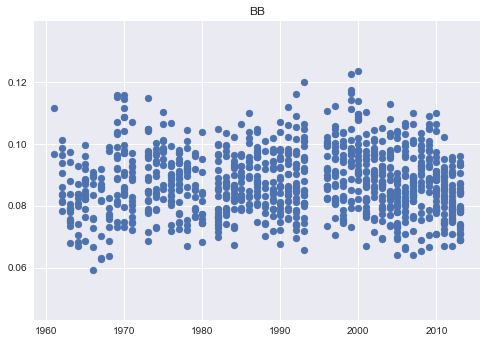

In [6]:
### Your code here ###
for col in ['1B', '2B', '3B', 'HR', 'BB']:
    plt.scatter(stats['yearID'], stats[col])
    plt.title(col)
    plt.show()

**ANSWER**
There are noticeable time trends. The rate for doubles went up and BBs went down.

#### Problem 1(e) 

Using the `stats` DataFrame from Problem 1(c), adjust the singles per PA rates so that the average across teams for each year is 0. Do the same for the doubles, triples, HR, and BB rates. 

In [7]:
### Your code here ###
def meanNormalizeRates(df):
    sub = df[['1B', '2B', '3B', 'HR', 'BB']]
    df[['1B', '2B', '3B', 'HR', 'BB']] = sub - sub.mean(axis=0)
    return df

stats = stats.groupby('yearID').apply(meanNormalizeRates)
stats.head()

teamID  yearID   W        1B        2B        3B        HR        BB
1366    LAA    1961  70 -0.008502 -0.000137 -0.002113  0.007983  0.007465
1367    KC1    1961  61  0.008502  0.000137  0.002113 -0.007983 -0.007465
1377    NYA    1962  96  0.001516  0.002683 -0.002121  0.008141  0.005180
1379    LAA    1962  86 -0.006150  0.002174 -0.001040 -0.001356  0.010082
1381    CHA    1962  85  0.000165  0.004904  0.002352 -0.008813  0.012486

#### Problem 1(f)

Build a simple linear regression model to predict the number of wins from the average adjusted singles, double, triples, HR, and BB rates. To decide which of these terms to include fit the model to data from 2002 and compute the average squared residuals from predictions to years past 2002. Use the fitted model to define a new sabermetric summary: offensive predicted wins (OPW). Hint: the new summary should be a linear combination of one to five of the five rates.


In [8]:
### Your code here ###
from sklearn.linear_model import LinearRegression
from itertools import combinations
from sys import maxint

rates = ['1B', '2B', '3B', 'HR', 'BB']
bestRates = []
bestMeanSquaredError = maxint 
clf = LinearRegression()

for i in range(1, len(rates)+1):
    for x in combinations(rates, i):
        x = list(x)
        regr = LinearRegression()
        stats_train = stats[stats.yearID < 2002]
        stats_test = stats[stats.yearID >= 2002]

        X_train = stats_train[x].values
        X_test = stats_test[x].values

        Y_train = stats_train.W.values
        Y_test = stats_test.W.values

        regr.fit(X_train, Y_train)
        meanSquaredError = np.mean((Y_test - regr.predict(X_test))**2)

        if meanSquaredError < bestMeanSquaredError:
            bestMeanSquaredError = meanSquaredError
            bestRates = x
            clf.fit(X_train, Y_train)
        
print(', '.join('{}'.format(i) for v, i in enumerate(x)))
print('Mean Squared Error: %.2f' %bestMeanSquaredError)

1B, 2B, 3B, HR, BB
Mean Squared Error: 83.82


** Your answer here: ** The best model is the one that includes all five rates.

#### Problem 1(g)

Now we will create a similar database for individual players. Consider only player/year combinations in which the player had at least 500 plate appearances. Consider only the years we considered for the calculations above (after 1947 and seasons with 162 games). For each player/year compute singles, doubles, triples, HR, BB per plate appearance rates. Create a new pandas DataFrame called `playerstats` that has the playerID, yearID and the rates of these stats.  Remove the average for each year as for these rates as done in Problem 1(e). 

In [9]:
### Your code here ###
playersModified = players.copy()
playersModified['PA'] = playersModified['AB'] + playersModified['BB']
playersModified['1B'] = playersModified['H'] - playersModified['2B'] - playersModified['3B'] - playersModified['HR']

playersModified = playersModified[(playersModified.yearID > 1947) & (playersModified.PA >= 500)]

playerstats = pd.concat([playersModified['playerID'], playersModified['yearID'], 
                   playersModified['1B']/playersModified['PA'], playersModified['2B']/playersModified['PA'], 
                   playersModified['3B']/playersModified['PA'], playersModified['HR']/playersModified['PA'], 
                   playersModified['BB']/playersModified['PA']], axis=1, 
                  keys=['playerID', 'yearID', '1B', '2B', '3B', 'HR', 'BB'])

playerstats = playerstats.groupby('yearID').apply(meanNormalizeRates)

Show the head of the `playerstats` DataFrame. 

In [10]:
### Your code here ###
playerstats.head()

playerID  yearID        1B        2B        3B        HR        BB
8   aaronha01    1955  0.001060  0.018570  0.005585  0.011337 -0.027249
9   aaronha01    1956  0.021581  0.013895  0.012578  0.009438 -0.044519
10  aaronha01    1957  0.005503 -0.002189  0.000537  0.036908 -0.012659
11  aaronha01    1958  0.018367  0.011015 -0.002219  0.015398 -0.007762
12  aaronha01    1959  0.016261  0.025762  0.002743  0.028368 -0.022898

#### Problem 1(h)

Using the `playerstats` DataFrame created in Problem 1(g), create a new DataFrame called `playerLS` containing the player's lifetime stats. This DataFrame should contain the playerID, the year the player's career started, the year the player's career ended and the player's lifetime average for each of the quantities (singles, doubles, triples, HR, BB). For simplicity we will simply compute the avaerage of the rates by year (a more correct way is to go back to the totals). 

In [11]:
### Your code here ###
def getYear(str):
    return int(str[0:4])

playerLS = playerstats.groupby('playerID')['1B', '2B', '3B', 'HR', 'BB'].mean().reset_index()
playerLS = master[['playerID', 'debut', 'finalGame']].merge(playerLS, how='inner', on='playerID')
playerLS['debut'] = playerLS.debut.apply(getYear)
playerLS['finalGame'] = playerLS.finalGame.apply(getYear)
playerLS.columns = ['playerID', 'minYear', 'maxYear', '1B', '2B', '3B', 'HR', 'BB']

Show the head of the `playerLS` DataFrame. 

In [12]:
### Your code here ###
playerLS.head()

playerID  minYear  maxYear        1B        2B        3B        HR  \
0  aaronha01     1954     1976 -0.007039  0.006542 -0.000249  0.027814   
1  abramca01     1949     1956  0.013463 -0.023915  0.002384  0.003842   
2  abreubo01     1996     2012 -0.008230  0.006438  0.000983 -0.003154   
3  ackledu01     2011     2013 -0.009186 -0.016607 -0.002044 -0.015187   
4  adairje01     1958     1970  0.012235  0.003353 -0.002105 -0.013016   

         BB  
0  0.009415  
1  0.019455  
2  0.050532  
3  0.001574  
4 -0.037399

#### Problem 1(i)

Compute the OPW for each player based on the average rates in the `playerLS` DataFrame. You can interpret this summary statistic as the predicted wins for a team with 9 batters exactly like the player in question. Add this column to the playerLS DataFrame. Call this colum OPW.

In [13]:
### Your code here ###
playerAverageRates = playerLS[['1B', '2B', '3B', 'HR', 'BB']].values
playerLS['OPW'] = clf.predict(playerAverageRates)
playerLS.head()

playerID  minYear  maxYear        1B        2B        3B        HR  \
0  aaronha01     1954     1976 -0.007039  0.006542 -0.000249  0.027814   
1  abramca01     1949     1956  0.013463 -0.023915  0.002384  0.003842   
2  abreubo01     1996     2012 -0.008230  0.006438  0.000983 -0.003154   
3  ackledu01     2011     2013 -0.009186 -0.016607 -0.002044 -0.015187   
4  adairje01     1958     1970  0.012235  0.003353 -0.002105 -0.013016   

         BB         OPW  
0  0.009415  108.737373  
1  0.019455   92.575472  
2  0.050532  104.121778  
3  0.001574   53.831767  
4 -0.037399   56.467482

#### Problem 1(j)

Add four columns to the `playerLS` DataFrame that contains the player's position (C, 1B, 2B, 3B, SS, LF, CF, RF, or OF), first name, last name and median salary. 

In [14]:
### Your code here ###
from collections import defaultdict

def findPOS(df):
    positions = df.POS
    d = defaultdict(int)
    for pos in positions:
        d[pos] += 1
    result = max(d, key=d.get)
    return result
    
positions_df = fielding.groupby('playerID').apply(findPOS).reset_index()
positions_df.columns = ['playerID', 'POS']
playerLS_merged = positions_df.merge(playerLS, how='inner', on='playerID')
playerLS_merged = medianSalaries.merge(playerLS_merged, how='inner', on=['playerID'])

Show the head of the `playerLS` DataFrame. 

In [15]:
### Your code here ###
playerLS_merged.head()

playerID nameFirst nameLast   salary POS  minYear  maxYear        1B  \
0  abreubo01     Bobby    Abreu  9000000  RF     1996     2012 -0.008230   
1  ackledu01    Dustin   Ackley  2400000  1B     2011     2013 -0.009186   
2  adamsru01      Russ    Adams   329500  SS     2004     2009 -0.007867   
3  alfoned01   Edgardo  Alfonzo  4112500  2B     1995     2006  0.013541   
4  alicelu01      Luis   Alicea   750000  2B     1988     2002  0.035625   

         2B        3B        HR        BB         OPW  
0  0.006438  0.000983 -0.003154  0.050532  104.121778  
1 -0.016607 -0.002044 -0.015187  0.001574   53.831767  
2 -0.001289  0.004160 -0.017533  0.002672   67.496507  
3 -0.002185 -0.003255 -0.006373  0.010738   83.462334  
4 -0.009597  0.007988 -0.026156 -0.006580   78.561778

#### Problem 1(k)

Subset the `playerLS` DataFrame for players active in 2002 and 2003 and played at least three years. Plot and describe the relationship bewteen the median salary (in millions) and the predicted number of wins. 

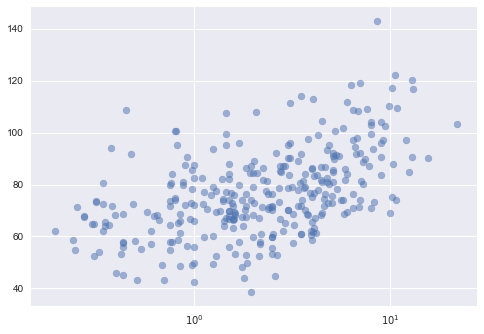

In [16]:
### Your code here ###
active = playerLS_merged[(playerLS_merged.minYear <= 2002) & (playerLS_merged.maxYear >= 2003) 
                        & (playerLS_merged.maxYear - playerLS_merged.minYear >= 3)]

plt.scatter(active["salary"]/10**6, active['OPW'], alpha=0.5)
plt.xscale('log')
plt.show()

#### Problem 1(l)
Pick one players from one of each of these 10 position C, 1B, 2B, 3B, SS, LF, CF, RF, DH, or OF keeping the total median salary of all 10 players below 20 million. Report their averaged predicted wins and total salary.

In [17]:
### Your code here ###
def meanNormalizeOPW(df):
    sub = df[['resid']]
    df[['resid']] = sub - sub.mean(axis=0)
    return df

active['resid'] = active['OPW']
active = active.groupby('POS').apply(meanNormalizeOPW)

/Users/William/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [18]:
active.salary.values.shape

(320,)

In [19]:
Y = active.resid.values
X = np.log(active[["salary"]])

clf = LinearRegression()
clf.fit(X,Y)

active['resid'] = Y - clf.predict(X)
active = active[active.resid >= 0]

In [20]:
def getCheapestPlayer(df, pos):
    temp = df[df['POS'] == pos]
    return temp.ix[temp['salary'].idxmin()]

def removePlayer(df, player):
    df.drop(df.index[df.playerID == player], inplace=True)
    return None

def teamSalary(df, team):
    team_salary = [df.loc[df['playerID'] == player, 'salary'] for player in team]
    return sum(team_salary)

In [21]:
posleft = ['CF', '1B', '2B', '3B', 'SS', 'LF', 'CF', 'RF', 'DH', 'OF']
moneyleft = 20*10**6
team = []

for i in range(len(posleft)):
    maxmoney = moneyleft - sum([getCheapestPlayer(active, pos).salary for pos in posleft])
    
    left = [True if pos in posleft else False for pos in active.POS.values]
    players_left = active[left & (active.salary <= maxmoney)]
    
    top_pick = players_left.ix[players_left['resid'].idxmax()]
    posleft.remove(top_pick.POS)
    team.append(top_pick.playerID)
    moneyleft -= top_pick.salary
    
topteam = active[active.playerID.isin(team)].sort(['OPW'], ascending=False)
topteam

/Users/William/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:16: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


playerID nameFirst   nameLast   salary POS  minYear  maxYear        1B  \
81   bondsba01     Barry      Bonds  8541667  OF     1986     2007 -0.045155   
275  ensbemo01    Morgan    Ensberg   450000  3B     2000     2008 -0.033243   
478  johnsni01      Nick    Johnson  1450000  1B     2001     2012 -0.030558   
237  delluda01     David   Dellucci   812500  LF     1997     2009 -0.050673   
927  werthja01    Jayson      Werth  1700000  RF     2002     2013 -0.015295   
853  sweenmi01      Mike    Sweeney  1450000  DH     1995     2010  0.017627   
55   bellhma01      Mark   Bellhorn   477500  2B     1997     2007 -0.039016   
877  torrean02    Andres     Torres  1500000  CF     2002     2013 -0.039314   
614  menecfr01     Frank  Menechino   314750  SS     1999     2005 -0.021803   

           2B        3B        HR        BB         OPW      resid  
81   0.001328  0.001382  0.030737  0.112057  143.125094  52.463386  
275 -0.003037 -0.000346  0.026321  0.047626  108.584662  47.421506  
478  0.018033 -0.002523 -0.000221  0.072478  107.726460  24.909483  
237 -0.018869  0.004528  0.024153  0.057238  100.483979  32.418838  
927 -0.000697 -0.003564  0.012380  0.032882   96.026221  11.185610  
853  0.013500 -0.004299  0.007064 -0.004878   95.394589   1.547886  
55   0.002195  0.001311  0.005503  0.046596   91.702735  31.885604  
877  0.025503  0.009005 -0.002836  0.006714   83.987202  15.597156  
614 -0.011205 -0.001758 -0.014305  0.046453   73.847911  25.576877

In [22]:
np.mean(topteam['OPW'])

100.09765047157407

#### Problem 1(m)
What do these players outperform in? Singles, doubles, triples HR or BB?

In [23]:
### Your code here ###

topteam[['1B', '2B', '3B', 'HR', 'BB']] = topteam[['1B', '2B', '3B', 'HR', 'BB']].apply(lambda x: x*10**3)
topteam_m = topteam[['nameFirst', 'nameLast', 'POS', '1B', '2B', '3B', 'HR', 'BB', 'OPW', 'salary']]
topteam_m

nameFirst   nameLast POS         1B         2B        3B         HR  \
81      Barry      Bonds  OF -45.154813   1.327781  1.381794  30.736996   
275    Morgan    Ensberg  3B -33.242909  -3.036924 -0.346418  26.320889   
478      Nick    Johnson  1B -30.558089  18.032656 -2.522560  -0.220817   
237     David   Dellucci  LF -50.672870 -18.868659  4.528334  24.152553   
927    Jayson      Werth  RF -15.294578  -0.696793 -3.563851  12.379760   
853      Mike    Sweeney  DH  17.627308  13.499514 -4.298900   7.064005   
55       Mark   Bellhorn  2B -39.015581   2.194913  1.311091   5.503275   
877    Andres     Torres  CF -39.313895  25.502765  9.004953  -2.836031   
614     Frank  Menechino  SS -21.802542 -11.205142 -1.758263 -14.305267   

             BB         OPW   salary  
81   112.057214  143.125094  8541667  
275   47.626068  108.584662   450000  
478   72.477995  107.726460  1450000  
237   57.237849  100.483979   812500  
927   32.882050   96.026221  1700000  
853   -4.878472   95.394589  1450000  
55    46.595604   91.702735   477500  
877    6.713663   83.987202  1500000  
614   46.453373   73.847911   314750

** Your answer here: ** Nearly all of them outperformed in BB

## Discussion for Problem 1

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---

# Problem 2:  $k$-Nearest Neighbors and Cross Validation 

What is the optimal $k$ for predicting species using $k$-nearest neighbor classification 
on the four features provided by the iris dataset.

In this problem you will get to know the famous iris data set, and use cross validation to select the optimal $k$ for a $k$-nearest neighbor classification. This problem set makes heavy use of the [sklearn](http://scikit-learn.org/stable/) library. In addition to Pandas, it is one of the most useful libraries for data scientists! After completing this homework assignment you will know all the basics to get started with your own machine learning projects in sklearn. 

Future lectures will give further background information on different classifiers and their specific strengths and weaknesses, but when you have the basics for sklearn down, changing the classifier will boil down to exchanging one to two lines of code.

The data set is so popular, that sklearn provides an extra function to load it:

In [24]:
#load the iris data set
iris = sklearn.datasets.load_iris()

X = iris.data  
Y = iris.target

print X.shape, Y.shape

(150, 4) (150,)


#### Problem 2(a) 
Split the data into a train and a test set. Use a random selection of 33% of the samples as test data. Sklearn provides the [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html) function for this purpose. Print the dimensions of all the train and test data sets you have created. 

In [25]:
### Your code here ###
from sklearn.cross_validation import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

((100, 4), (50, 4), (100,), (50,))


#### Problem 2(b)

Examine the data further by looking at the projections to the first two principal components of the data. Use the [`TruncatedSVD`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) function for this purpose, and create a scatter plot. Use the colors on the scatter plot to represent the different classes in the target data. 

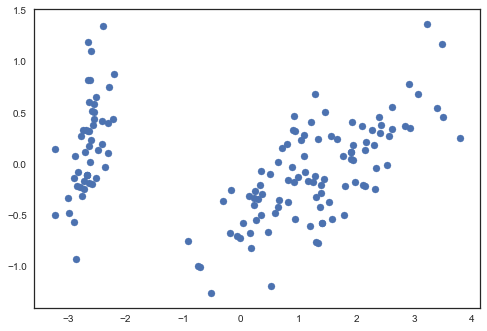

In [26]:
### Your code here ###
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD()
X_norm = X - np.mean(X, axis=0)
X_pca = svd.fit_transform(X_norm)
sns.set_style('white')
plt.scatter(X_pca[:,0], X_pca[:,1])

#### Problem 2(c) 

In the lecture we discussed how to use cross validation to estimate the optimal value for $k$ (the number of nearest neighbors to base the classification on). Use ***ten fold cross validation*** to estimate the optimal value for $k$ for the iris data set. 

**Note**: For your convenience sklearn does not only include the [KNN classifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), but also a [grid search function](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html#sklearn.grid_search.GridSearchCV). The function is called grid search, because if you have to optimize more than one parameter, it is common practice to define a range of possible values for each parameter. An exhaustive search then runs over the complete grid defined by all the possible parameter combinations. This can get very computation heavy, but luckily our KNN classifier only requires tuning of a single parameter for this problem set. 

In [27]:
### Your code here ###
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

k = np.arange(1, 21)
parameters = {'n_neighbors': k}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters, cv=10)
clf.fit(X_train, Y_train)

#clf.cv_results_

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

#### Problem 2(d)

Visualize the result by plotting the score results versus values for $k$. 

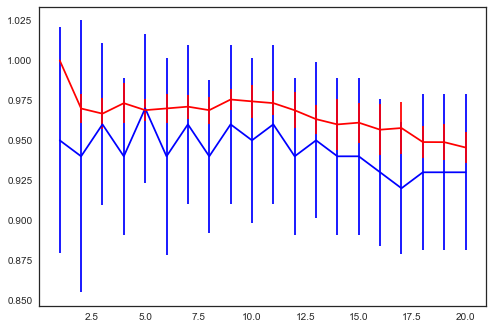

In [28]:
### Your code here ###
a = clf.cv_results_
mean_test_scores = a['mean_test_score']
mean_train_scores = a['mean_train_score']
std_test_scores = a['std_test_score']
std_train_scores = a['std_train_score']

plt.errorbar(k, mean_test_scores, std_test_scores, label='Test', c='b')
plt.errorbar(k, mean_train_scores, std_train_scores, label='Train', c='r')
plt.show()

Verify that the grid search has indeed chosen the right parameter value for $k$.

In [29]:
### Your code here ###
clf.best_params_

{'n_neighbors': 5}

#### Problem 2(e)

Test the performance of our tuned KNN classifier on the test set.

In [30]:
### Your code here ###
from sklearn.metrics import accuracy_score

score = accuracy_score(Y_test, clf.predict(X_test))
print(score)

0.98


## Discussion for Problem 2

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---

# Problem 3: The Curse and Blessing of Higher Dimensions

In this problem we will investigate the influence of higher dimensional spaces on the classification. The data set is again one of the standard data sets from sklearn. The [digits data set](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) is similar to the MNIST data set discussed in the lecture. The main difference is, that each digit is represented by an 8x8 pixel image patch, which is considerably smaller than the 28x28 pixels from MNIST. In addition, the gray values are restricted to 16 different values (4 bit), instead of 256 (8 bit) for MNIST. 

First we again load our data set.

In [31]:
digits = sklearn.datasets.load_digits()

X = digits.data  
Y = digits.target

print X.shape, Y.shape

(1797, 64) (1797,)


#### Problem 3(a) 

Start with the same steps as in Problem 2. Split the data into train and test set. Use 33% of the samples as test data. Print the dimensions of all the train and test data sets you created. 

In [32]:
### Your code here ###
from sklearn.cross_validation import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

((1203, 64), (594, 64), (1203,), (594,))


#### Problem 3(b) 

Similar to Problem 2(b), create a scatter plot of the projections to the first two PCs.  Use the colors on the scatter plot to represent the different classes in the target data. How well can we separate the classes?

**Hint**: Use a `Colormap` in matplotlib to represent the diferent classes in the target data. 

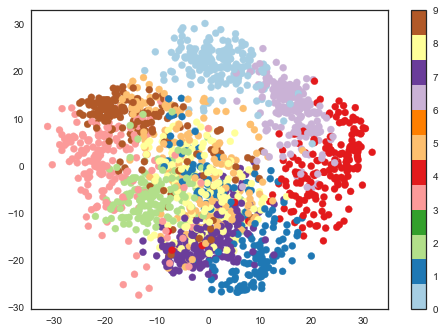

In [33]:
### Your code here ###
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD()
X_norm = X - np.mean(X, axis=0)

sns.set_style('white')

X_pca = svd.fit_transform(X_norm)
plt.scatter(X_pca[:,0], X_pca[:,1], c=Y, cmap=plt.cm.Paired)
plt.colorbar()
plt.show()

Create individual scatter plots using only two classes at a time to explore which classes are most difficult to distinguish in terms of class separability.  You do not need to create scatter plots for all pairwise comparisons, but at least show one. 

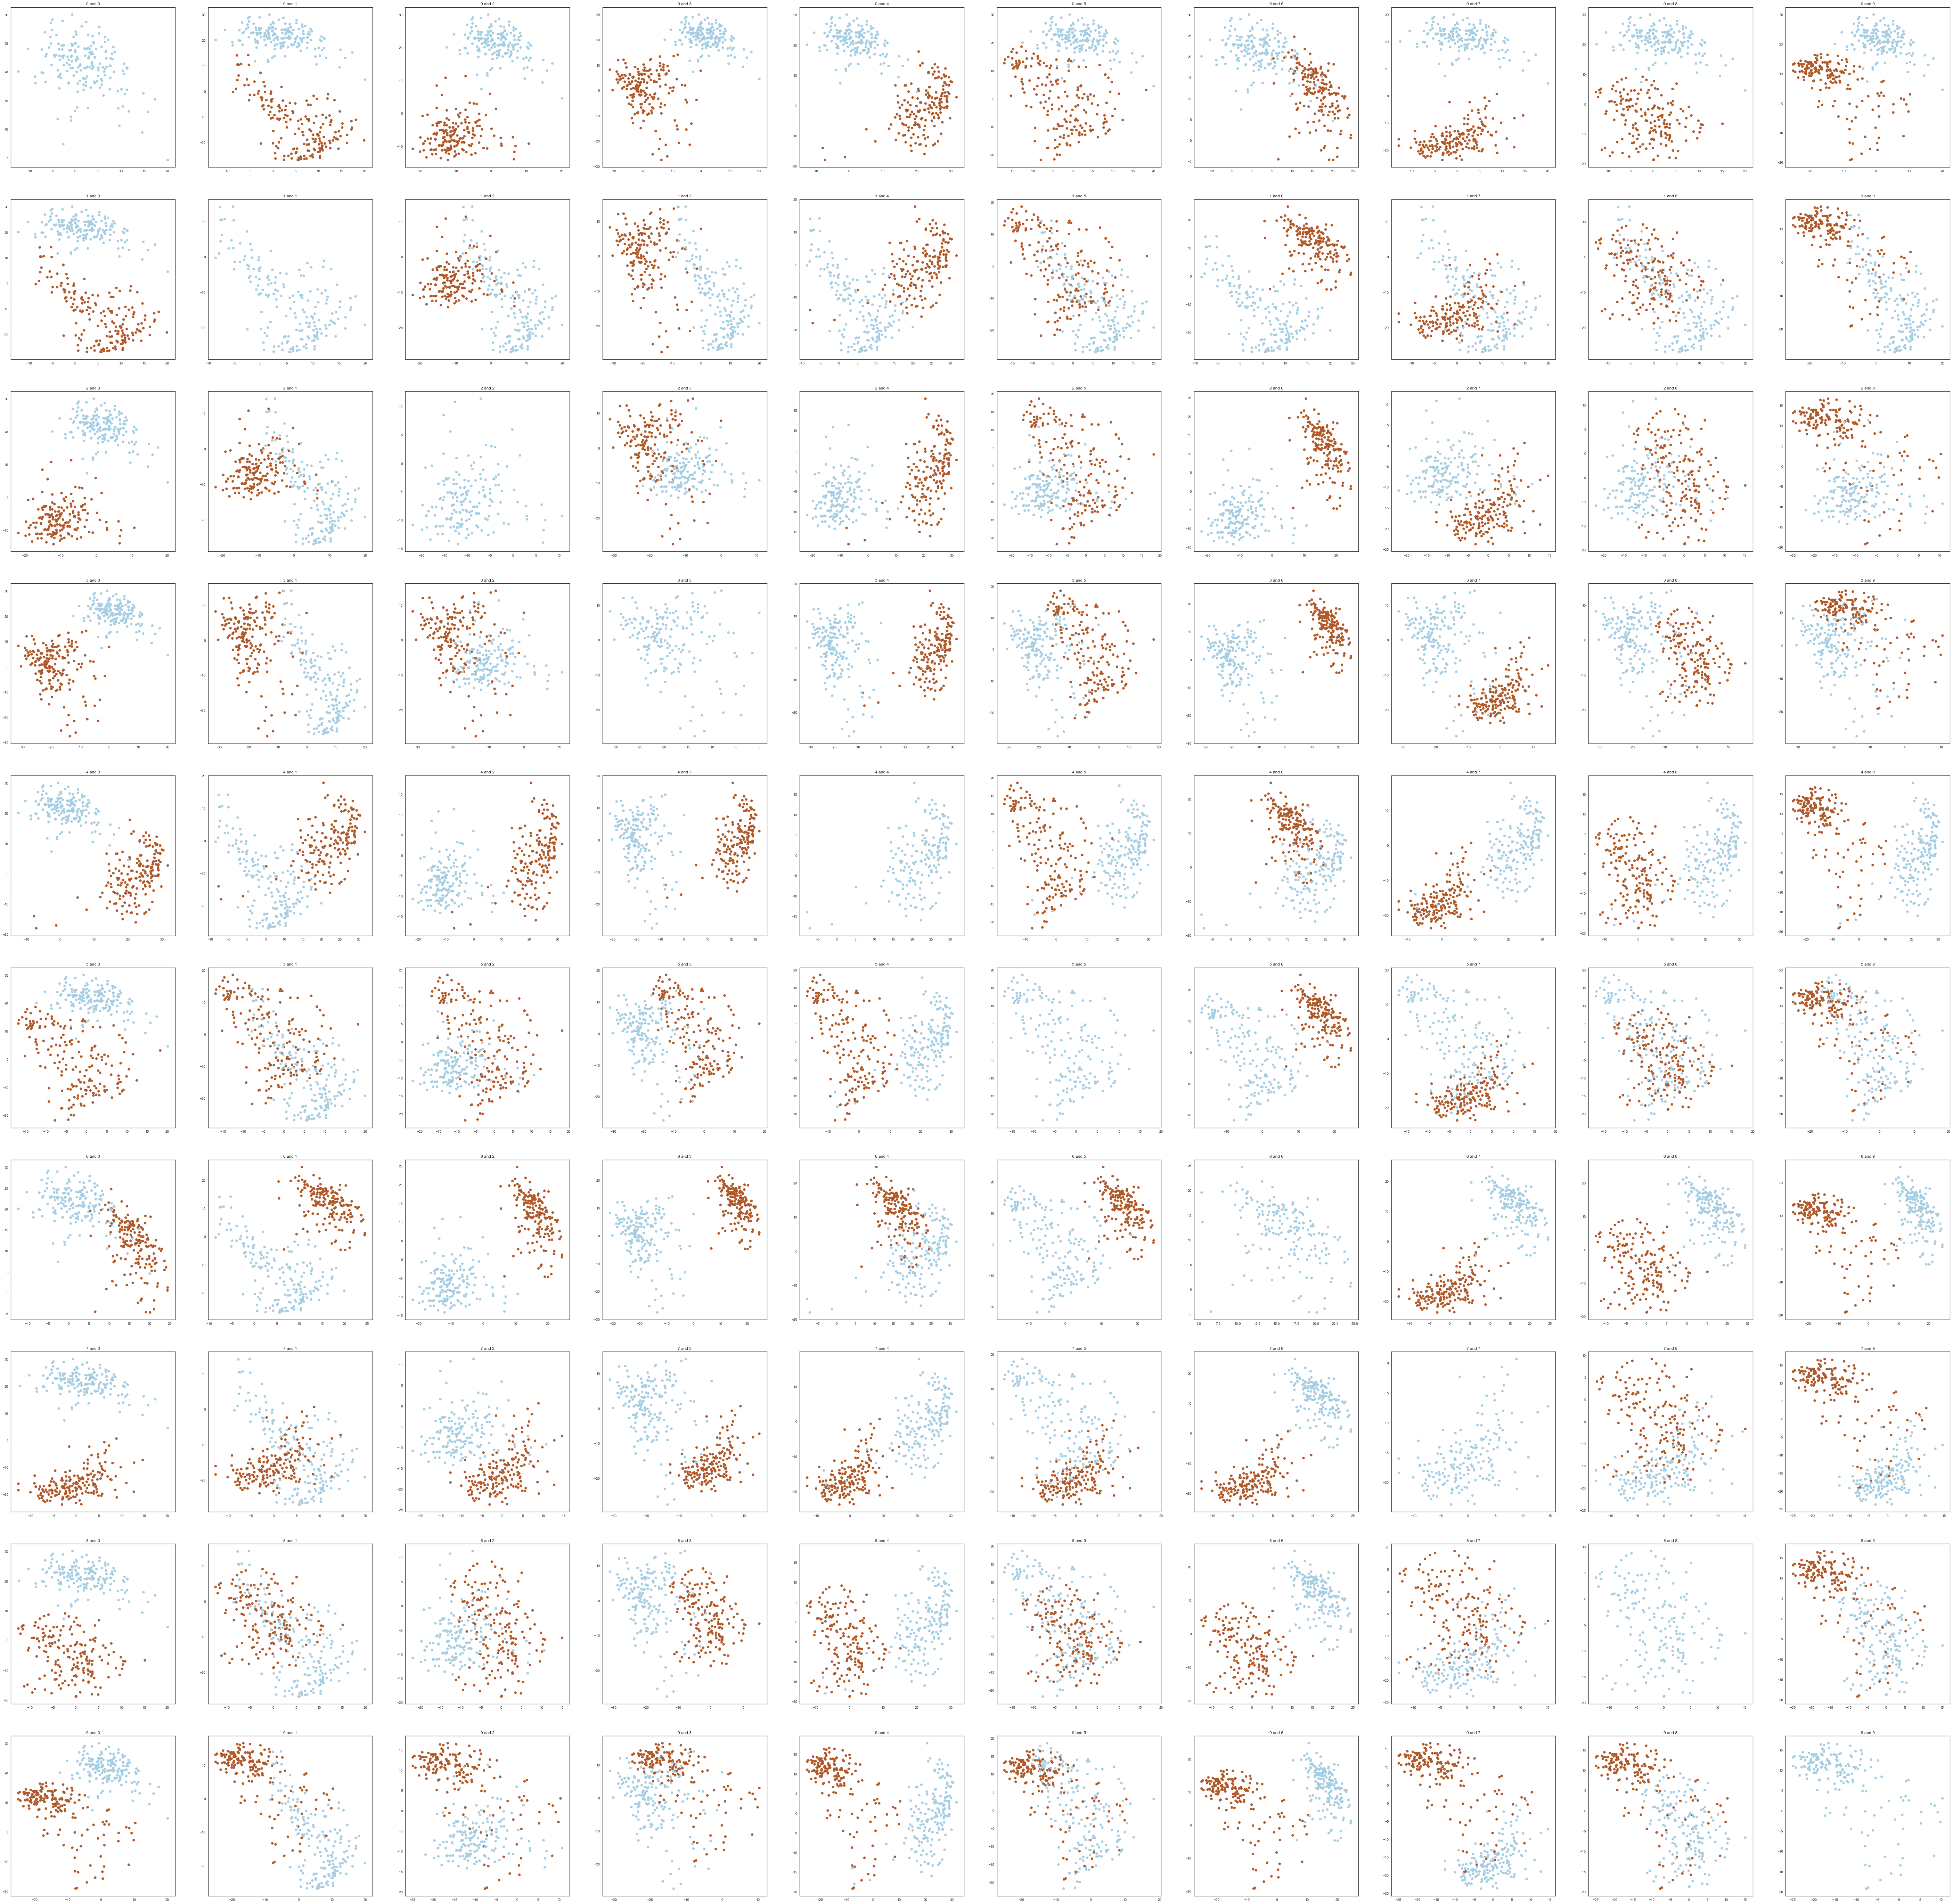

In [37]:
### Your code here ###
pca_x = X_pca[:,0]
pca_y = X_pca[:,1]

fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(100, 100))

for i in range(10):
    for j in range(10):
        condition = np.logical_or((Y == i), (Y == j))
        mod_Y = Y[condition]
        mod_x = pca_x[condition]
        mod_y = pca_y[condition]
        ax[i, j].scatter(mod_x, mod_y, c=mod_Y, cmap=plt.cm.Paired)
        ax[i, j].set_title(str(i) + ' and ' + str(j))

plt.show()

Give a brief interpretation of the scatter plot. Which classes look like hard to distinguish? Do both feature dimensions contribute to the class separability? 

** Your answer here: **

#### Problem 3(c) 

Write a **ten-fold cross validation** to estimate the optimal value for $k$ for the digits data set. *However*, this time we are interested in the influence of the number of dimensions we project the data down as well. 

Extend the cross validation as done for the iris data set, to optimize $k$ for different dimensional projections of the data. Create a boxplot showing test scores for the optimal $k$ for each $d$-dimensional subspace with $d$ ranging from one to ten. The plot should have the scores on the y-axis and the different dimensions $d$ on the x-axis. You can use your favorite plot function for the boxplots. [Seaborn](http://web.stanford.edu/~mwaskom/software/seaborn/index.html) is worth having a look at though. It is a great library for statistical visualization and of course also comes with a [`boxplot`](http://web.stanford.edu/~mwaskom/software/seaborn/generated/seaborn.boxplot.html) function that has simple means for changing the labels on the x-axis.

In [41]:
### Your cross validation and evaluation code here ###
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

k = np.arange(1, 21)
parameters = {'n_neighbors': k}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters, cv=10)
all_scores = []
all_k = []
all_d = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for d in all_d:
    svd = TruncatedSVD(n_components=d)
    X_norm = X_train - np.mean(X_train, axis=0)
    X_pca = svd.fit_transform(X_norm)
    clf.fit(X_pca, Y_train)
    all_k.append(clf.best_params_)
    all_scores.append(score = accuracy_score(Y_test, clf.predict(X_test)))
    
#print(all_k)

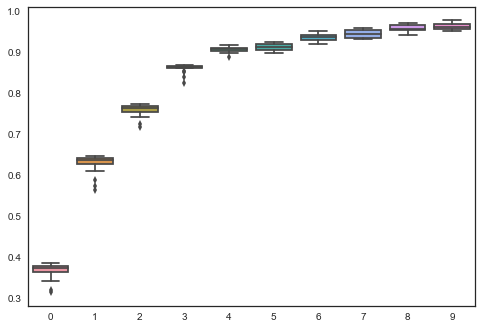

In [52]:
### Your boxplot code here ### 
all_s = np.asarray(all_scores)
sns.boxplot(data=all_s.T, names=all_d)

Write a short interpretation of the generated plot, answering the following questions:

* What trend do you see in the plot for increasing dimensions?

* Why do you think this is happening?

** Your answer here: **

#### Problem 3(d) 

**For AC209 Students**: Change the boxplot we generated above to also show the optimal value for $k$ chosen by the cross validation grid search. 

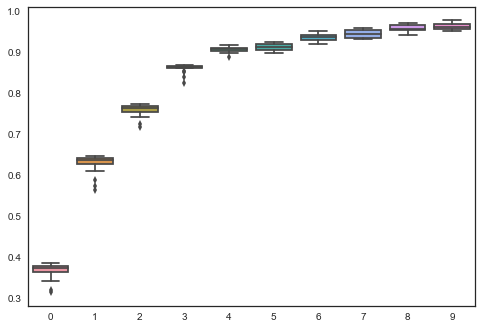

In [55]:
### Your code here ### 
sns.boxplot(data=all_s.T, names=[str(d) + ' k=' + str(k) for (d, k) in zip(all_d, all_k)])

Write a short interpretation answering the following questions:

* Which trend do you observe for the optimal value of $k$?

* Why do you think this is happening?

** Your answer here: **

## Discussion for Problem 3

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---

# Submission Instructions

To submit your homework, create a folder named **lastname_firstinitial_hw#** and place your IPython notebooks, data files, and any other files in this folder. Your IPython Notebooks should be completely executed with the results visible in the notebook. We should not have to run any code.  Compress the folder (please use .zip compression) and submit to the CS109 dropbox in the appropriate folder. *If we cannot access your work because these directions are not followed correctly, we will not grade your work.*
